In [19]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# # thinkstats tool
# import thinkstats2
# import thinkplot

# numpy, matplotlib, seaborn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# get train & test csv files as a DataFrame
train = pd.read_csv("data_summary.csv", sep=',')

In [26]:
print train.describe()
print train.columns
print train[train.Age <=24]

              Age        Educ         SES         CDR       MMSE         eTIV  \
count  416.000000  235.000000  216.000000  233.000000  235.00000   416.000000   
mean    52.701923    3.178723    2.490741    0.270386   27.06383  1480.526442   
std     25.082180    1.311510    1.120593    0.350281    3.69687   158.343745   
min     18.000000    1.000000    1.000000    0.000000   14.00000  1123.000000   
25%     24.000000    2.000000    2.000000    0.000000   26.00000  1366.750000   
50%     56.000000    3.000000    2.000000    0.000000   29.00000  1475.000000   
75%     75.000000    4.000000    3.000000    0.500000   30.00000  1578.000000   
max     96.000000    5.000000    5.000000    1.000000   30.00000  1992.000000   

             nWBV         ASF  
count  416.000000  416.000000  
mean     0.789267    1.199999  
std      0.060107    0.128245  
min      0.644000    0.881200  
25%      0.740000    1.112550  
50%      0.804500    1.190000  
75%      0.841000    1.284800  
max      0.893

<p>
    Our Convulutional Neural Network will be used to predict all the columns in our data set. We want to group strongly correlated predicted features together that we predict will be able to be accurately modeled by one neural network. We can do this by exploring the relationship statistically but also interpret the columns
</p>

<p>
    We can start by splitting our data into 4 roughly equal age groups.
</p>


In [21]:
age_1 = train[train.Age < 24]
age_2 = train[(train.Age >= 24) & (train.Age < 55)]
age_3 = train[(train.Age >= 55) & (train.Age < 75)]
age_4 = train[(train.Age >= 75) & (train.Age <= 90)]

print age_1.describe()
print age_2.describe()
print age_3.describe()
print age_4.describe()

             Age  Educ  SES  CDR  MMSE         eTIV        nWBV         ASF
count  100.00000     0    0    0     0   100.000000  100.000000  100.000000
mean    20.83000   NaN  NaN  NaN   NaN  1529.230000    0.848570    1.161083
std      1.52458   NaN  NaN  NaN   NaN   135.999766    0.016396    0.106277
min     18.00000   NaN  NaN  NaN   NaN  1218.000000    0.800000    0.917400
25%     20.00000   NaN  NaN  NaN   NaN  1442.750000    0.839000    1.103025
50%     21.00000   NaN  NaN  NaN   NaN  1515.000000    0.848000    1.159800
75%     22.00000   NaN  NaN  NaN   NaN  1593.000000    0.858250    1.217625
max     23.00000   NaN  NaN  NaN   NaN  1913.000000    0.887000    1.441400
              Age       Educ        SES  CDR       MMSE         eTIV  \
count  102.000000  26.000000  25.000000   26  26.000000   102.000000   
mean    37.392157   4.038462   1.800000    0  29.576923  1471.470588   
std     10.663305   0.999230   0.816497    0   0.643309   162.378223   
min     24.000000   2.000000

<p>
    eTIV, nWBV, ASF are all derived measurements of anatomic volumes and thus will be heavily correlated. To visualize the relationship we will scatter plot them against each other.
</p>

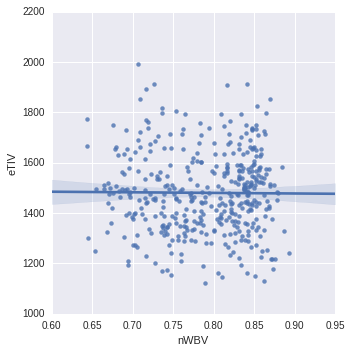

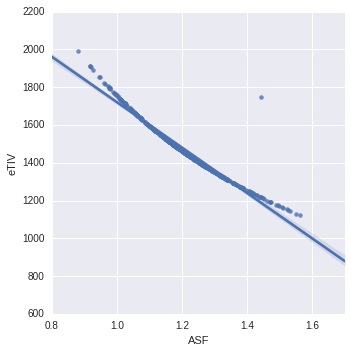

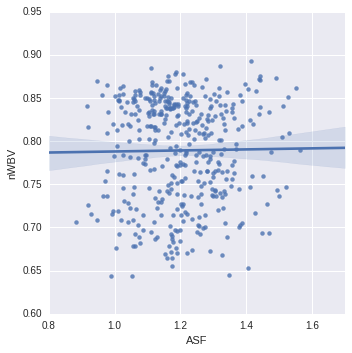

In [32]:
sns.lmplot('nWBV', 'eTIV', data=train)
sns.lmplot('ASF', 'eTIV', data=train)
sns.lmplot('ASF', 'nWBV', data=train)


<p> We see that there is an extremely strong negative relationship between eTIV and ASF but nWBV is not correlated with the other two factors</p>

 <p>In addition we can explore the effect of age on the volume predictions. We know that in general the brain will shrink as we age. </p>

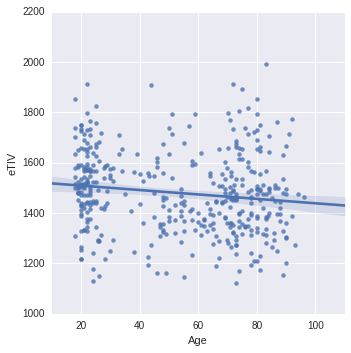

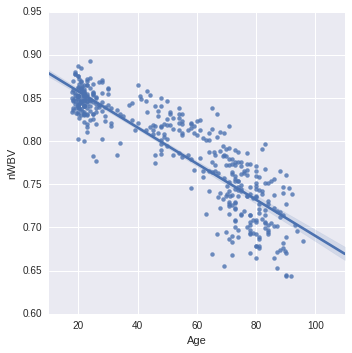

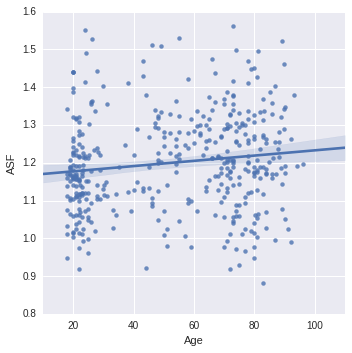

In [33]:
def plot_age_vs_volume(age_group):
    """ Takes an age group and looks at correlation between age and 3 different indicators eTIV, nWBV, and ASF
    Takes: age group
    Return: 3 scatter plot diagrams
    """
    #We will jitter the age data slightly to get a better representation
    sns.lmplot('Age', 'eTIV', data=age_group, x_jitter=.05)
    sns.lmplot('Age', 'nWBV', data=age_group, x_jitter=.05)
    sns.lmplot('Age', 'ASF', data=age_group, x_jitter=.05)
plot_age_vs_volume(train)



<p>
    From the 3 graphs there is a definate strong negative correlation between Age and nWBV. The other two measures however are extremely variable with a slight negative between age and eTIV and age and ASF
</p>

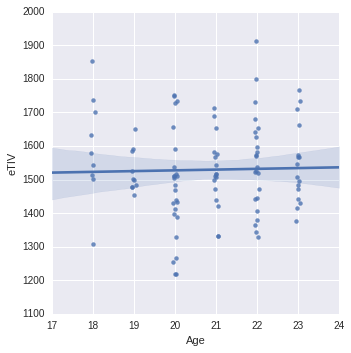

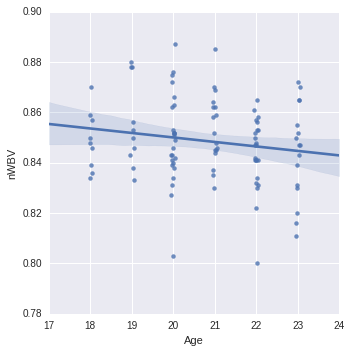

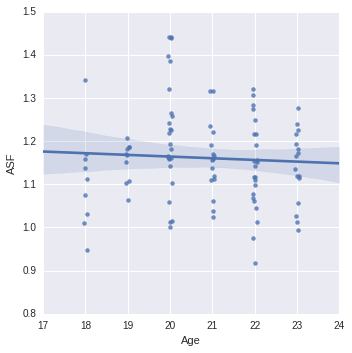

In [34]:
plot_age_vs_volume(age_1)

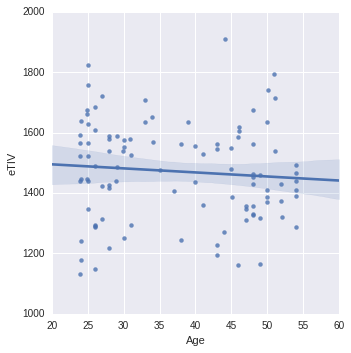

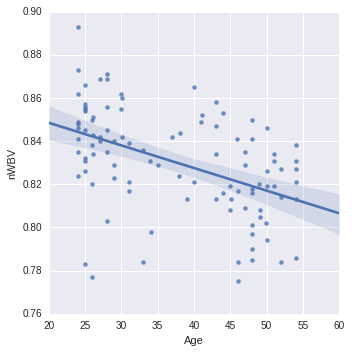

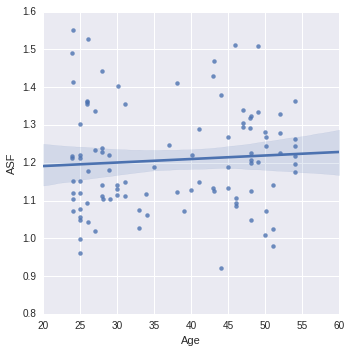

In [35]:
plot_age_vs_volume(age_2)


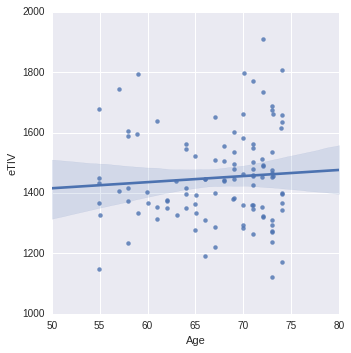

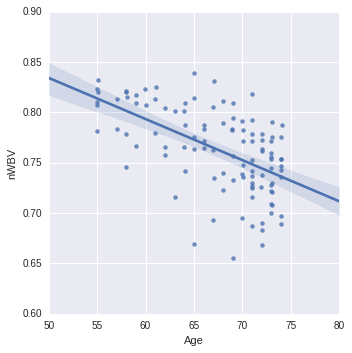

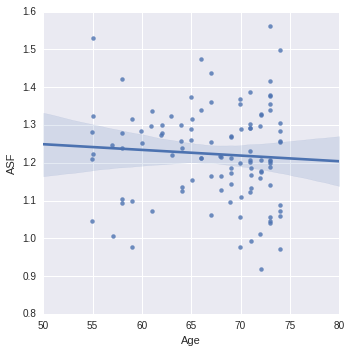

In [36]:
plot_age_vs_volume(age_3)


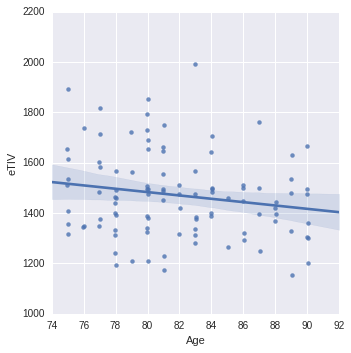

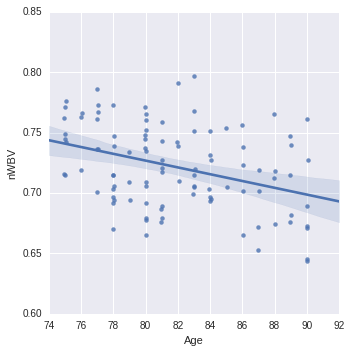

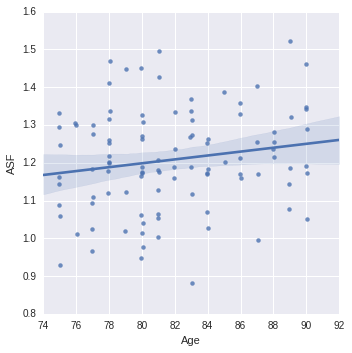

In [37]:

plot_age_vs_volume(age_4)